In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.0
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [2]:
# layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=(None, 5))  # input_shape往往第一层指定
print(type(layer))
print('-'*50)
# layer是输入为5，输出为100的全连接层，所以对于输入为10x5的矩阵来看，会乘以一个5x100的矩阵，所以输出就是10x100
layer(tf.ones([10, 5]))  # 这里是对应层的输出

<class 'keras.layers.core.dense.Dense'>
--------------------------------------------------


<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[ 3.52346838e-01,  3.01123559e-02, -4.12447929e-01,
        -3.94739389e-01,  3.64843279e-01, -6.38917506e-01,
        -1.19742960e-01,  2.20532984e-01,  2.54925370e-01,
         4.19780850e-01,  1.29562691e-01, -2.27048069e-01,
         2.09648654e-01, -2.71335363e-01,  2.16068372e-01,
         7.22914487e-02, -1.07321993e-01, -2.24011093e-01,
        -1.21806502e-01,  1.77026093e-02,  2.17786431e-02,
        -2.33111337e-01,  1.55561253e-01, -1.40160292e-01,
         3.00422400e-01,  6.12778246e-01, -1.63135558e-01,
        -2.49504432e-01,  7.95426220e-02, -3.40925753e-01,
         1.46456897e-01, -2.23784700e-01, -5.32576442e-03,
         2.92024732e-01,  2.46511176e-01, -9.40905660e-02,
        -1.45723268e-01,  8.46904963e-02, -6.45129383e-02,
        -4.05768603e-02,  2.91939735e-01,  3.85644019e-01,
         3.82549822e-01, -3.37747872e-01,  3.58836085e-01,
         1.18517071e-01,  1.92804724e-01,  6.71285093e-02,
     

In [3]:
# layer.variables 可以打印layer里包含的所有参数
# x * w + b, w就是指层的参数，kernel就是w，bias就是b
print(layer.variables)
print('-'*50)
# 获得所有可训练的变量,和上面的变量数目一致
layer.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[ 0.17918234, -0.07707007, -0.16100825, -0.12076918,  0.17583461,
         0.03338574, -0.0356402 ,  0.10399   ,  0.02757962,  0.10231619,
         0.03995182, -0.21766073,  0.1387655 , -0.0073114 ,  0.01430272,
         0.1942674 ,  0.00468551, -0.18477494,  0.0991639 , -0.22225276,
         0.06872471,  0.03350769, -0.09983937, -0.15619999,  0.12593167,
        -0.05684003, -0.14740558,  0.17700161,  0.22240104, -0.21916819,
        -0.20806476, -0.14517927, -0.03059125,  0.23109938, -0.02959524,
        -0.13148044,  0.07114775, -0.07772145, -0.16225491,  0.02237229,
         0.13856904,  0.08158226,  0.16014902, -0.06497315,  0.02871732,
         0.13423486,  0.08206002,  0.13501109, -0.20549569, -0.06121498,
         0.09362839,  0.07332952,  0.1919197 ,  0.0299805 , -0.12142061,
        -0.08617578,  0.14440979, -0.016488  , -0.22776483, -0.02901152,
        -0.15356492, -0.1931158 , -0.19000068,  0.028913

[<tf.Variable 'dense/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 0.17918234, -0.07707007, -0.16100825, -0.12076918,  0.17583461,
          0.03338574, -0.0356402 ,  0.10399   ,  0.02757962,  0.10231619,
          0.03995182, -0.21766073,  0.1387655 , -0.0073114 ,  0.01430272,
          0.1942674 ,  0.00468551, -0.18477494,  0.0991639 , -0.22225276,
          0.06872471,  0.03350769, -0.09983937, -0.15619999,  0.12593167,
         -0.05684003, -0.14740558,  0.17700161,  0.22240104, -0.21916819,
         -0.20806476, -0.14517927, -0.03059125,  0.23109938, -0.02959524,
         -0.13148044,  0.07114775, -0.07772145, -0.16225491,  0.02237229,
          0.13856904,  0.08158226,  0.16014902, -0.06497315,  0.02871732,
          0.13423486,  0.08206002,  0.13501109, -0.20549569, -0.06121498,
          0.09362839,  0.07332952,  0.1919197 ,  0.0299805 , -0.12142061,
         -0.08617578,  0.14440979, -0.016488  , -0.22776483, -0.02901152,
         -0.15356492, -0.1931158 , -0.190000

In [4]:
help(layer)

Help on Dense in module keras.layers.core.dense object:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `ker

In [5]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
# print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [6]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [10]:
# 使用lamba，一行代码就搞定
# tf.math.softplus : log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.math.log(1+tf.math.exp(x)))
print(customized_softplus([[-10., -5., 0., 5., 10.],[-10., -5., 0., 5., 10.]]))

tf.Tensor(
[[4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01]
 [4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01]], shape=(2, 5), dtype=float32)


In [12]:
# customized dense layer
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units  # 神经元个数
        self.activation = keras.layers.Activation(activation)  # 激活函数，直接使用tf提供的
        super(CustomizedDenseLayer, self).__init__(**kwargs)  # 继承父类
    
    def build(self, input_shape):
        """构建所需要的参数，也就是kernel还有bias"""
        # x * w + b， input_shape:[None, a]， w:[a,b]， output_shape: [None, b]
        print('-'*50)
        print(input_shape)
        # add_weight是父类里自带的，用来初始化权重
        self.kernel = self.add_weight(name = 'kernel',
                                      shape = (input_shape[1], self.units),
                                      initializer = 'uniform',  # 使用均匀分布的方法去初始化kernel
                                      trainable = True)  # 设置为可训练
        self.bias = self.add_weight(name = 'bias',
                                    shape = (self.units, ),
                                    initializer = 'zeros',
                                    trainable = True)
        # 继承父类的build
        super(CustomizedDenseLayer, self).build(input_shape)
    
    def call(self, x):
        """完成正向计算，实现activation（wx+b）"""
        return self.activation(x @ self.kernel + self.bias)

# 完全模仿dense来实现自定义层，因此input_shape传的和dense一致，只需要是特征数，父类Layer自动会转为二维的input_shape，然后再传递给build
model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',
                         input_shape=x_train.shape[1:]),  # 这里传入的是特征数
    CustomizedDenseLayer(1,activation=customized_softplus),
])
model.summary()
model.compile(loss="mean_squared_error", 
              optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

--------------------------------------------------
(None, 8)
--------------------------------------------------
(None, 30)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 customized_dense_layer_2 (C  (None, 30)               270       
 ustomizedDenseLayer)                                            
                                                                 
 customized_dense_layer_3 (C  (None, 1)                31        
 ustomizedDenseLayer)                                            
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 10,
                    callbacks = callbacks)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.2201 - val_loss: 0.6810
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5926 - val_loss: 0.5878
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5195 - val_loss: 0.5268
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4760 - val_loss: 0.4847
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4524 - val_loss: 0.4642
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4418 - val_loss: 0.4796
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4394 - val_loss: 0.4520
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4195 - val_loss: 0.4319
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4101 - val_loss: 0.4217
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4037 - val_loss: 0.4326

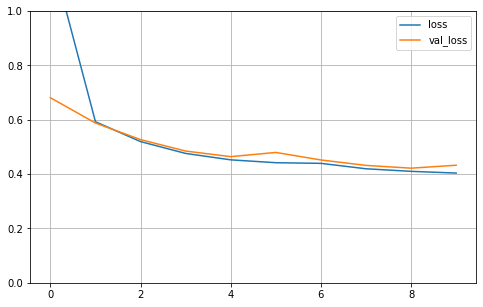

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [15]:
model.evaluate(x_test_scaled, y_test, verbose=0)

0.4298405051231384